In [63]:
import Graphics.Color.Demo
import Graphics.Color.Model as M
import qualified Data.Massiv.Array as A
import Data.Complex
import Control.Monad
:set -XTypeApplications

In [2]:
:t ColorRGB

ColorRGB :: forall e. e -> e -> e -> Color RGB e

In [3]:
c = ColorRGB 0 125 255 :: Color RGB Word8
print c

<RGB:(  0,125,255)>

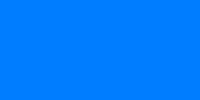

In [4]:
displayColorModelRGB c

In [5]:
fmap (fromIntegral :: Word8 -> Word16) c

<RGB:(    0,  125,  255)>

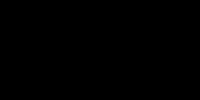

In [6]:
displayColorModelRGB $ fmap (fromIntegral :: Word8 -> Word16) c

toWord16 :: forall e. Elevator e => e -> Word16

<RGB:(  0,125,255)>

<RGB:(    0,32125,65535)>

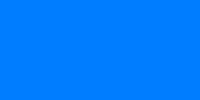

In [39]:
:t toWord16
c
fmap toWord16 c
displayColorModelRGB $ fmap toWord16 c

In [7]:
-- Appropriate scaling:
fmap toWord16 c
fmap toWord32 c
fmap toWord64 c

<RGB:(    0,32125,65535)>

<RGB:(         0,2105376125,4294967295)>

<RGB:(                   0, 9042521604759584125,18446744073709551615)>

<RGB:( 0.000000, 0.490196, 1.000000)>

<RGB:( 0.000000000000, 0.490196078431, 1.000000000000)>

In [8]:
-- Floating point
fmap toFloat c
fmap toDouble c

<RGB:( 0.000000, 0.490196, 1.000000)>

<RGB:( 0.000000000000, 0.490196078431, 1.000000000000)>

In [23]:
("Bit", minValue :: Bit, maxValue :: Bit)
("Word8", minValue :: Word8, maxValue :: Word8)
("Word16", minValue :: Word16, maxValue :: Word16)
("Word32", minValue :: Word32, maxValue :: Word32)
("Word64", minValue :: Word64, maxValue :: Word64)
("Word", minValue :: Word, maxValue :: Word)
-- Floating point:
("Float", minValue :: Float, maxValue :: Float)
("Double", minValue :: Double, maxValue :: Double)
("Complex", minValue :: Complex Double, maxValue :: Complex Double)

("Bit",0,1)

("Word8",0,255)

("Word16",0,65535)

("Word32",0,4294967295)

("Word64",0,18446744073709551615)

("Word",0,18446744073709551615)

("Float",0.0,1.0)

("Double",0.0,1.0)

("Complex",0.0 :+ 0.0,1.0 :+ 1.0)

In [25]:
--  Coverting functions do the scaling and clamping
fmap toWord8 (ColorRGB 0.1 0.5 100.5 :: Color RGB Float)

<RGB:( 26,128,255)>

In [36]:
:t toRealFloat
c
cf = fmap (toRealFloat @_ @Float) c
cf

toRealFloat :: forall e a. (Elevator e, Elevator a, RealFloat a) => e -> a

<RGB:(  0,125,255)>

<RGB:( 0.000000, 0.490196, 1.000000)>

In [37]:
:t fromRealFloat
fmap (fromRealFloat @Word8) cf

fromRealFloat :: forall e a. (Elevator e, Elevator a, RealFloat a) => a -> e

<RGB:(  0,125,255)>

In [60]:
-- Useful classes for every `ColorModel`:
cf
putStrLn "Foldable: (eg. sum)"
sum cf
putStrLn "Applicative: (eg. channelwise operations)"
ColorRGB (+1) (*2) (/2) <*> cf
putStrLn "Traversible:"
forM cf $ \x -> guard (x >= 0) >> Just x

<RGB:( 0.000000, 0.490196, 1.000000)>

Foldable: (eg. sum)

1.4901961

Applicative: (eg. channelwise operations)

<RGB:( 1.000000, 0.980392, 0.500000)>

Traversible:

Just <RGB:( 0.000000, 0.490196, 1.000000)>

In [71]:
putStrLn "Num, Fractional, Floating"
cf
cf / 10
cf + ColorRGB 0.2 0.5 (-0.1)
0.5 :: Color RGB Float

Num, Fractional, Floating

<RGB:( 0.000000, 0.490196, 1.000000)>

<RGB:( 0.000000, 0.049020, 0.100000)>

<RGB:( 0.200000, 0.990196, 0.900000)>

<RGB:( 0.500000, 0.500000, 0.500000)>

In [67]:
putStrLn "NFData, Unbox, Storable:"
A.makeArrayR A.S A.Seq (A.Sz2 3 4) $ \(i A.:. j) -> (fromIntegral @_ @Word8) <$> ColorRGB i j (i * 10 + j)

NFData, Unbox, Storable

Array S Seq (Sz (3 :. 4))
  [ [ <RGB:(  0,  0,  0)>, <RGB:(  0,  1,  1)>, <RGB:(  0,  2,  2)>, <RGB:(  0,  3,  3)> ]
  , [ <RGB:(  1,  0, 10)>, <RGB:(  1,  1, 11)>, <RGB:(  1,  2, 12)>, <RGB:(  1,  3, 13)> ]
  , [ <RGB:(  2,  0, 20)>, <RGB:(  2,  1, 21)>, <RGB:(  2,  2, 22)>, <RGB:(  2,  3, 23)> ]
  ]

In [96]:
putStrLn $ replicate 30 '=' <> " Available ColorModels " <> replicate 30 '=' <> unlines ["", "Y - luminance", "RGB - Red Green Blue", "HSI - Hue Saturation Intensity", "HSV - Hue Saturation Value", "HSL - Hue Saturation LIghtness (brightness)", "YCbCr - Luma, blue- and red-difference chroma components", "CMYK - Cyan, Magenta, Yellow, and Key (black)", "Alpha - transparency wrapper"]

============================== Available ColorModels ==============================
Y - luminance
RGB - Red Green Blue
HSI - Hue Saturation Intensity
HSV - Hue Saturation Value
HSL - Hue Saturation LIghtness (brightness)
YCbCr - Luma, blue- and red-difference chroma components
CMYK - Cyan, Magenta, Yellow, and Key (black)
Alpha - transparency wrapper

<HSV:( 0.584967, 1.000000, 1.000000)>

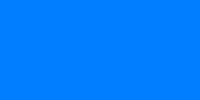

In [80]:
rgb2hsv cf
displayColorModelHSV $ rgb2hsv cf

In [99]:
ColorCMYK 0.1 0.2 0.3 0.4 :: Color CMYK Float

<CMYK:( 0.100000, 0.200000, 0.300000, 0.400000)>

In [102]:
show cf <> " - " <> show (hsi2rgb (rgb2hsi cf))
show cf <> " - " <> show (cmyk2rgb (rgb2cmyk cf))

"<RGB:( 0.000000, 0.490196, 1.000000)> - <RGB:( 0.000000, 0.490196, 1.000000)>"

"<RGB:( 0.000000, 0.490196, 1.000000)> - <RGB:( 0.000000, 0.490196, 1.000000)>"

In [94]:
:t Alpha
Alpha c 0
Alpha (ColorHSI 0.1 0.2 0.3) (0.5 :: Float)
Alpha (ColorYCbCr 0.1 0.2 0.3) (0.5 :: Float)

Alpha :: forall cs e. Color cs e -> e -> Color (Alpha cs) e

<Alpha (RGB):(  0,125,255,  0)>

<Alpha (HSI):( 0.100000, 0.200000, 0.300000, 0.500000)>

<Alpha (YCbCr):( 0.100000, 0.200000, 0.300000, 0.500000)>